<a href="https://colab.research.google.com/github/orhanaydinn/brainTumor_Alzheimer_Prediction/blob/main/BrainTumor_Alzheimer_Detection_current.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - Uploaded Dataset**

brain_disease_classification_dataset.zip file upload manually.
```
zip_path = "/content/brain_disease_classification_dataset.zip"
extract_path = "/content/brain_disease_classification_dataset"
```
**zip_path** represents the file path of the uploaded ZIP file.

**extract_path** defines the destination directory where the contents of the ZIP file will be extracted.

In [2]:
import zipfile
import os

# File and directory paths to extract
zip_path = "/content/brain_disease_classification_dataset_v3.zip"
extract_path = "/content/brain_disease_classification_dataset_v3"

# Open zip file and extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset successfully extracted to:", extract_path)


Dataset successfully extracted to: /content/brain_disease_classification_dataset_v3


Check the loaded datasets before data preparation process.

In [4]:
for root, dirs, files in os.walk(extract_path):
    print(f"\n{root}")
    for d in dirs:
        print(f"├── {d}")
    for f in files[:5]:
        print(f"├── {f}")


/content/brain_disease_classification_dataset_v3
├── brain_disease_classification_dataset_v3

/content/brain_disease_classification_dataset_v3/brain_disease_classification_dataset_v3
├── alzheimer_non_demented
├── tumor_yes
├── tumor_no
├── alzheimer_mild_demented
├── alzheimer_moderate_demented
├── alzheimer_very_mild_demented

/content/brain_disease_classification_dataset_v3/brain_disease_classification_dataset_v3/alzheimer_non_demented
├── non_demented_2702.jpg
├── non_demented_3136.jpg
├── non_demented_713.jpg
├── non_demented_2824.jpg
├── non_demented_1658.jpg

/content/brain_disease_classification_dataset_v3/brain_disease_classification_dataset_v3/tumor_yes
├── tumor_yes_5754.jpg
├── tumor_yes_2790.jpg
├── tumor_yes_5040.jpg
├── tumor_yes_3302.jpg
├── tumor_yes_2270.jpg

/content/brain_disease_classification_dataset_v3/brain_disease_classification_dataset_v3/tumor_no
├── aug_tumor_no_1165_0_6276.jpeg
├── aug_tumor_no_2065_0_6352.jpeg
├── aug_tumor_no_391_0_2074.jpeg
├── aug_tumo

**` def show_random_images(dataset_dir, samples=3):`**
This function displays a random 3 sample images from each class.

**`img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`**
cv2 library create BGR images default setting. This code convert BGR to RGB.



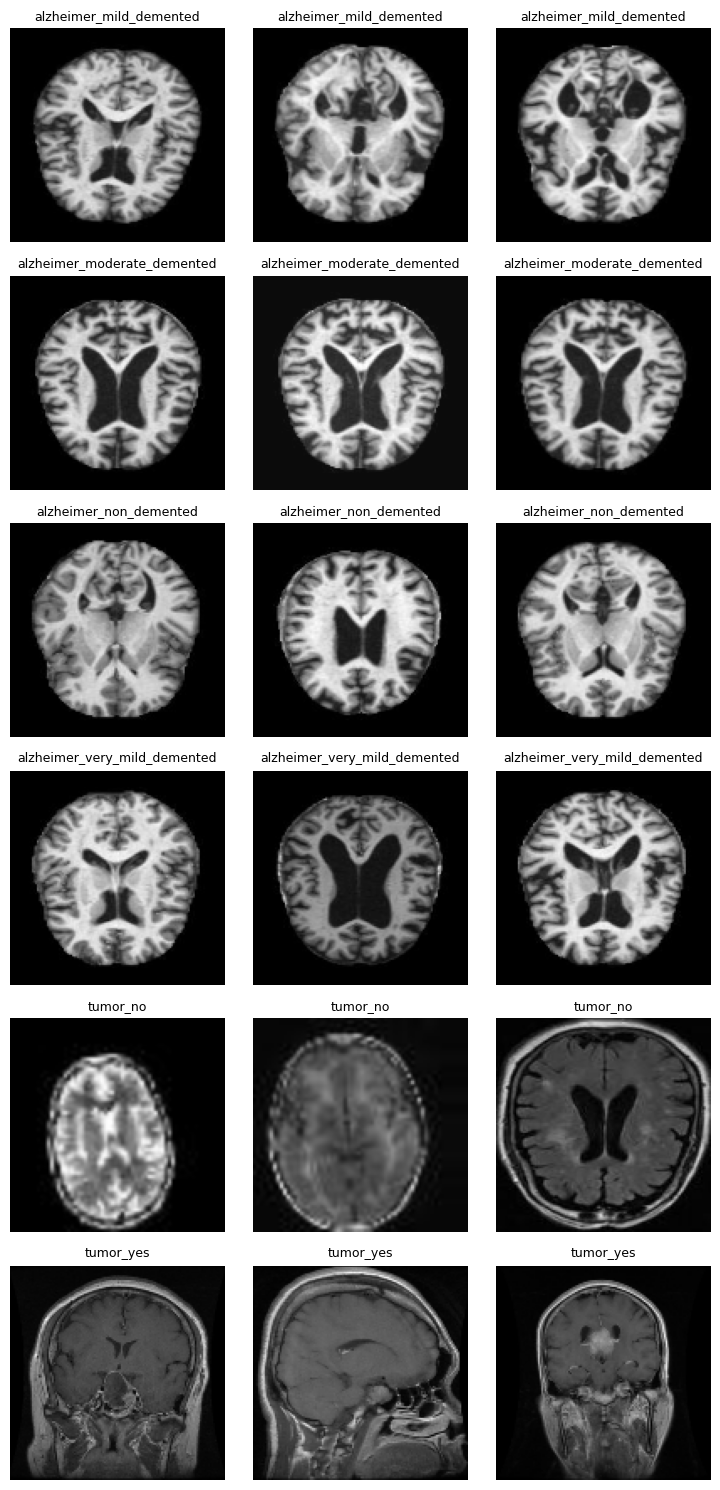

In [5]:
import os
import cv2
import random
import matplotlib.pyplot as plt

IMG_SIZE = 128

def show_random_images(dataset_dir, samples=3):

    inner_dir = os.path.join(dataset_dir, 'brain_disease_classification_dataset_v3')
    class_folders = [f for f in os.listdir(inner_dir) if os.path.isdir(os.path.join(inner_dir, f))]

    rows = len(class_folders)
    cols = samples
    plt.figure(figsize=(cols * 2.5, rows * 2.5))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(inner_dir, label)
        images = os.listdir(class_path)
        random.shuffle(images)

        for img_name in images[:samples]:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=9)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_random_images("/content/brain_disease_classification_dataset_v3", samples=3)


Check the dataset size before pre processing.

                              Image Count
alzheimer_mild_demented              2501
alzheimer_moderate_demented          3000
alzheimer_non_demented               3200
alzheimer_very_mild_demented         2240
tumor_no                             6000
tumor_yes                            6679


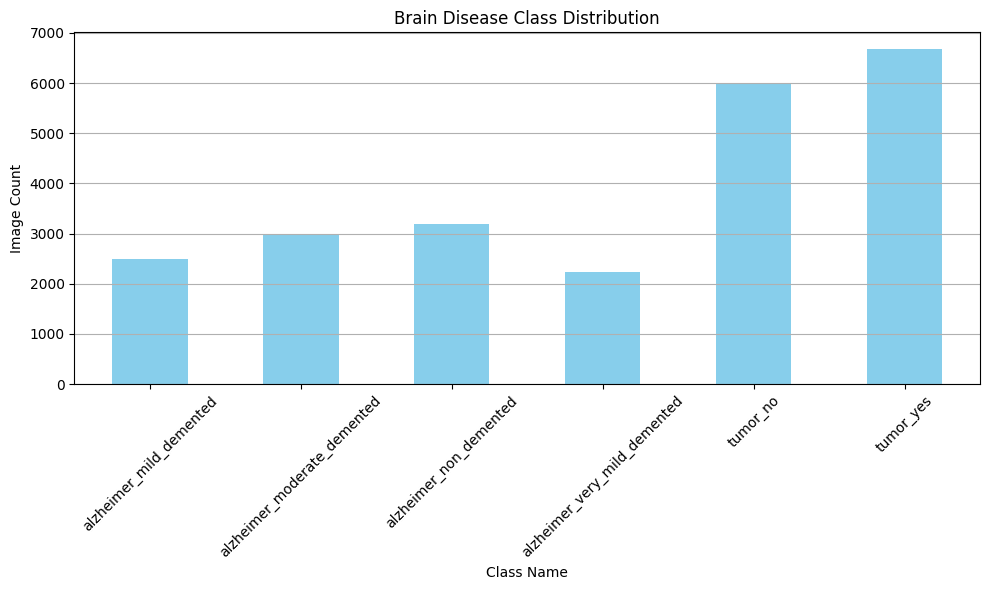

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt


base_dir = "/content/brain_disease_classification_dataset_v3/brain_disease_classification_dataset_v3"


def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            class_counts[class_name] = len(image_files)
    return class_counts


class_counts = count_images_in_folders(base_dir)


df_counts = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])


print(df_counts)


df_counts.plot(kind="bar", figsize=(10, 6), legend=False, color="skyblue")
plt.title("Brain Disease Class Distribution")
plt.ylabel("Image Count")
plt.xlabel("Class Name")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **2 - Tumor Data Preparation & Preprocessing**

In this section, the data was examined and augmentation was applied to some labels.

*   Load and Label Data
*   Read, Resize and Convert Images to Arrays
*   Convert to Numpy Arrays and Normalize the Pixel Values
*   Data Augmentation
    *   Class Distribution Table
    *   Augmentation for **tumor_no** labels
        *   Show Augmentation Images
*   Show Current Dataset




> **Since the models were trained with the latest data, data augmentation was applied already and the dataset was loaded that way. The data augmentation in this section is only representative and is included to show what codes are used.**

## 2.1 - Load and Label Data

**`label_map = {label: idx for idx, label in enumerate(class_names)}`**

This code automatically detects the class folders in the dataset directory and maps each class to a unique integer.

In [7]:
import os


DATASET_DIR = "/content/brain_disease_classification_dataset_v3/brain_disease_classification_dataset_v3"


all_classes = sorted(os.listdir(DATASET_DIR))


alzheimer_classes = [c for c in all_classes if c.startswith("alzheimer")]
tumor_classes = [c for c in all_classes if c.startswith("tumor")]


label_map = {}

for idx, label in enumerate(alzheimer_classes):
    label_map[label] = idx

for idx, label in enumerate(tumor_classes):
    label_map[label] = idx + len(alzheimer_classes)

print("Label Mapping:", label_map)


Label Mapping: {'alzheimer_mild_demented': 0, 'alzheimer_moderate_demented': 1, 'alzheimer_non_demented': 2, 'alzheimer_very_mild_demented': 3, 'tumor_no': 4, 'tumor_yes': 5}


## 2.2 - Read, Resize and Convert Images to Arrays

In this project image size is used 64x64 (`IMG_SIZE = 64`) . Therefore, this code `img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))` resize all of images which are differents size.

In [8]:
import os
import cv2
import numpy as np


DATASET_DIR = "/content/brain_disease_classification_dataset_v3/brain_disease_classification_dataset_v3"


all_classes = sorted(os.listdir(DATASET_DIR))
alzheimer_classes = [c for c in all_classes if c.startswith("alzheimer")]
tumor_classes = [c for c in all_classes if c.startswith("tumor")]


label_map = {}
for idx, label in enumerate(alzheimer_classes):
    label_map[label] = idx
for idx, label in enumerate(tumor_classes):
    label_map[label] = idx + len(alzheimer_classes)



IMG_SIZE = 64

X = []
y = []

for label in alzheimer_classes + tumor_classes:
    class_path = os.path.join(DATASET_DIR, label)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0
            X.append(img)
            y.append(label_map[label])


## 2.3 - Convert to NumPy Arrays & Normalize the Pixel Values

This code block makes the data types available for model training and normalizes the pixel values ​​of the images.

```
X = np.array(X, dtype='float32')
y = np.array(y)
```
Converts the Python lists X and y into NumPy arrays.

In [9]:
X = np.array(X, dtype=np.float32)
y = np.array(y)
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (23620, 64, 64, 3)
y shape: (23620,)


## 2.4 - Data Augmentation

### 2.4.1 -  Class Distribution Table

### 2.4.2 - Tumor_NO Augmentation

`target_count = 6000` The target number of images was determined as 6000 and the current number of images was subtracted from this number `to_generate = target_count - current_count`.

`for img_name in tqdm(existing_images):` This function generated the required number of images.

```
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8,1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)
```


*   Every images was rotated 15°. `rotation_range=15`
*   Zoomed by 10% `zoom_range=0.1`.
*   Slightly shifted horizontally and vertically `width_shift_range=0.1,
height_shift_range=0.1`.
*   Brightness was adjusted between 80% and 120%. `brightness_range=[0.8,1.2]`
*   Some images were flipped horizontally. Empty areas were filled using the nearest pixel method. `horizontal_flip=True, fill_mode='nearest'`


` aug_name = f"aug_tumor_no_{image_idx}.jpg"` This code adds the names **aug_tumor_no_1, aug_tumor_no_2, ..... , aug_tumor_no_n** to the new images

In [10]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation ayarları
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

# Klasör ve hedef ayarları
target_count = 6000
input_folder = "/content/brain_disease_classification_dataset_v3/brain_disease_classification_dataset_v3/tumor_no"
IMG_SIZE = 64

# Geçerli resimleri al
existing_images = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
current_count = len(existing_images)
to_generate = target_count - current_count

print(f"Current: {current_count} — Target: {target_count} — Generating: {to_generate}")

image_idx = 1
generated = 0

for img_name in tqdm(existing_images):
    if generated >= to_generate:
        break

    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path)
    if img is None:
        continue

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.reshape((1, IMG_SIZE, IMG_SIZE, 3))

    aug_iter = datagen.flow(
        img,
        batch_size=1,
        save_to_dir=input_folder,
        save_prefix=f'aug_tumor_no_{image_idx}',
        save_format='jpeg'
    )

    for _ in range(2):
        if generated >= to_generate:
            break
        next(aug_iter)
        image_idx += 1
        generated += 1

print("✅ The augmentation process is complete.")


Current: 6000 — Target: 6000 — Generating: 0


  0%|          | 0/6000 [00:00<?, ?it/s]

✅ The augmentation process is complete.


#### 2.4.2.1 - Show Augmentation Images

Check new augmentation 15 images randomly. `sample_imgs = random.sample(aug_images, min(15, len(aug_images)))`

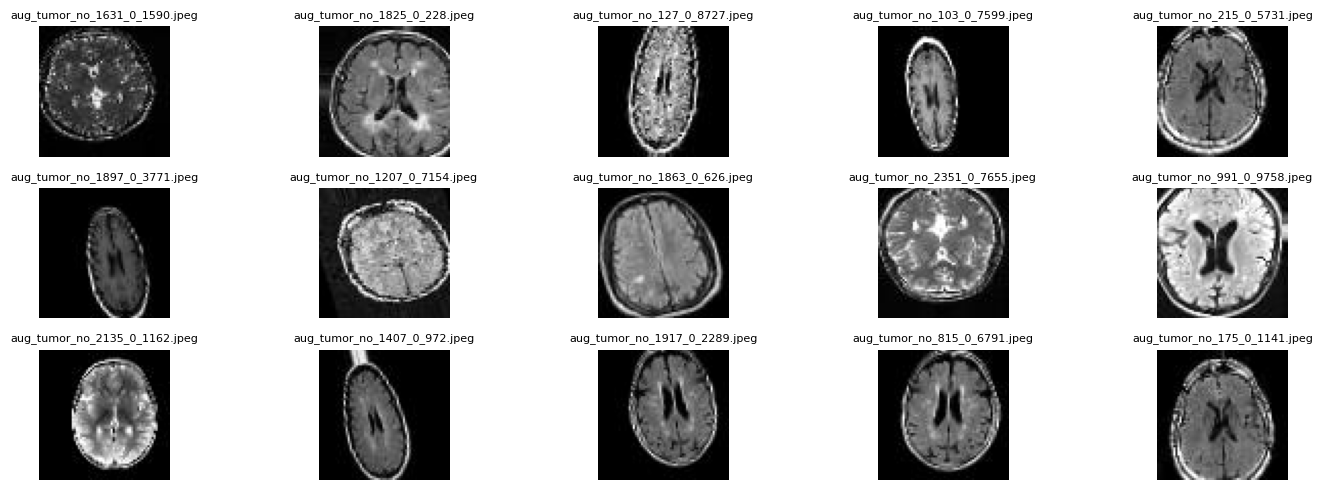

In [11]:
import matplotlib.pyplot as plt
import cv2
import os
import random


augmented_folder = "/content/brain_disease_classification_dataset_v3/brain_disease_classification_dataset_v3/tumor_no"


aug_images = [img for img in os.listdir(augmented_folder) if img.startswith("aug_")]

# Show random 15 images for augmentation
sample_imgs = random.sample(aug_images, min(15, len(aug_images)))


plt.figure(figsize=(15, 5))
for idx, img_name in enumerate(sample_imgs):
    img_path = os.path.join(augmented_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 5, idx + 1)
    plt.imshow(img)
    plt.title(img_name, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


## 2.5 - Show Current Dataset

After the data augmentation, dataset was controlled and created table which are class and image count.

                          Class  Image Count      Group
5                     tumor_yes         6679      Tumor
4                      tumor_no         6000      Tumor
2        alzheimer_non_demented         3200  Alzheimer
1   alzheimer_moderate_demented         3000  Alzheimer
0       alzheimer_mild_demented         2501  Alzheimer
3  alzheimer_very_mild_demented         2240  Alzheimer


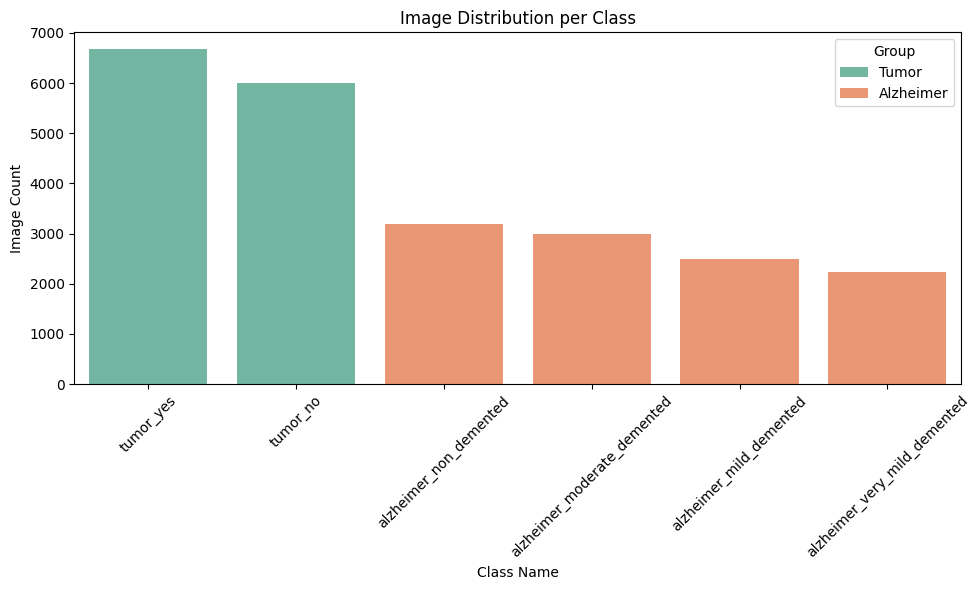

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


base_dir = "/content/brain_disease_classification_dataset_v3/brain_disease_classification_dataset_v3"


def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            class_counts[class_name] = len(image_files)
    return class_counts


class_counts = count_images_in_folders(base_dir)


tumor_counts = {k: v for k, v in class_counts.items() if k.startswith("tumor")}
alz_counts = {k: v for k, v in class_counts.items() if k.startswith("alzheimer")}


df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df["Group"] = df["Class"].apply(lambda x: "Tumor" if x.startswith("tumor") else "Alzheimer")
df = df.sort_values("Image Count", ascending=False)


print(df)


plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Class", y="Image Count", hue="Group", dodge=False, palette="Set2")
plt.title("Image Distribution per Class")
plt.xlabel("Class Name")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **3 - Model Training & Evaluation**

In this section, CNN and ML models are created and compared for **tumor and alzheimer dataset**.

*   Split Data ( Train / Test )
*   CNN Model
*   CNN Model Training
    *   Training Visualization
    *   Confusion Matrix
*   VGG16 - Transfer Learning Model
*   VGG16 - Transfer Learning Model Training
    *   Training Visualization
    *   Confusion Matrix
*   EfficientNetB0 - Transfer Learning Model
*   EfficientNetB0 - Transfer Learning Model Training
    *   Training Visualization
    *   Confusion Matrix
*   ResNet50 - Transfer Learning Model
*   ResNet50 - Transfer Learning Model Training
    *   Training Visualization
    *   Confusion Matrix

*   Compare All Models

## 3.1 - Split the Data (Train / Test)

The train and test datasets are separated by 20%.

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (18896, 64, 64, 3)
y_train shape: (18896,)


## 3.2 - CNN Model

Base cnn was created for first cnn model.


**CNN - Model Architecture**

```
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
```


*   `Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3))` Aconvolutional layer with 32 filters of size 3x3 and ReLU activation.
*   `Conv2D(64, (3, 3), activation='relu')` Reduces spatial dimensions.

*   `Flatten()` Converts the 2D feature maps into a 1D vector for dense layers.

*    `Dense(128, activation='relu'),` A fully connected layer with 128 units and ReLU activation.

*     `Dropout(0.5)` Drops 50% of the neurons to prevent overfitting.

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical


IMG_SIZE = 64
NUM_CLASSES = 6

if y_train.ndim != 2:
    y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
if y_test.ndim != 2:
    y_test = to_categorical(y_test, num_classes=NUM_CLASSES)


cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # 6 sınıf için
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**CNN - Model Compilation**

```
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
```

*   `optimizer='adam'` In this project the Adam optimization algorithm was preferred. Adam automatically adapts the learning rate for each parameter separately using first and second moment estimates. This leads to faster and more stable convergence during training.


In [15]:
# Compile
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # veya sparse_categorical_crossentropy
    metrics=['accuracy']
)


**CNN - EarlyStopping**
```
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
```
Stops training if validation accuracy does not improve for 5 consecutive epochs. Recovers the best weights.


In [16]:
# Callbacks
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

**CNN - Model Checkpoint**

```
model_checkpoint = ModelCheckpoint(
    filepath='best_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)
```
Saves the model file with the best validation accuracy. The best validation accuracy was saved "**best_cnn_model_tumor.h5**" in this cnn model. This checkpoint will be used directly in the later stages of the project. There is no need to retrain the model each time it is run from the beginning.


In [17]:
checkpoint = ModelCheckpoint(
    filepath='best_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [18]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,926 (6.20 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

### 3.2.1 - CNN Model Training

**CNN - Time Calculation**

```
import time
start = time.time()


end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

```
Starts a timer to measure how long model training takes. After the training, stops the timer and prints total training time in seconds.


**CNN - Model Training**
```
history_cnn = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, model_checkpoint],
    verbose=1
)
```



*   `X_train, y_train,` Trains the CNN model using the training data.
*   `epochs=30, batch_size=32` Training was run for 30 epochs, and process 32 images at a time (batch size).
*   `callbacks=[early_stop,` This code can stops training if validation loss doesn’t improve for a few epochs.
*   `callbacks=[  ,model_checkpoint]` Saves the model with the best validation accuracy.
*   `verbose=1` Prints progress of training for each epoch.

In [19]:
import time
start = time.time()

history_cnn = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30
588/591 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5870 - loss: 0.9651

KeyboardInterrupt: 

**CNN Model Training Summary**

The model completed its learning in approximately 38 minutes. It completed the learning process in the 30th epoch and achieved the best result in the 26th epoch.

#### 3.2.1.1 CNN Model Training Visualization

In [20]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'history_cnn' is not defined

#### 3.3.1.2 Confusion Matrix for CNN Model

Confusion matrix was used for estimation calculation.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model

model = load_model("best_cnn_model.h5")

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


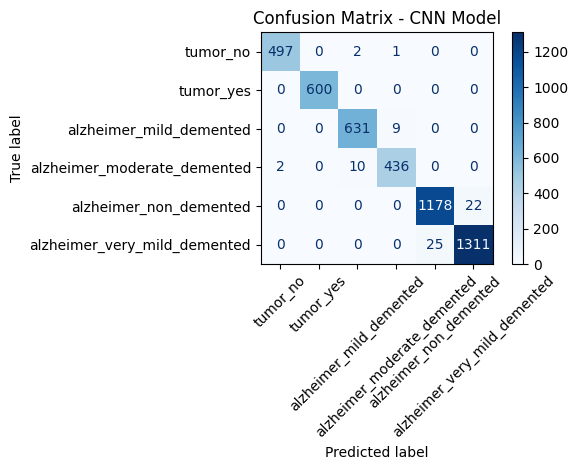

In [22]:
class_names = [
    "tumor_no",
    "tumor_yes",
    "alzheimer_mild_demented",
    "alzheimer_moderate_demented",
    "alzheimer_non_demented",
    "alzheimer_very_mild_demented"
]


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test


cm = confusion_matrix(y_true, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CNN Model")
plt.tight_layout()
plt.show()


## 3.3 - VGG16 - Transfer Learning Model

VGG16 Transfer Learning was created for another deep learning model.

**VGG16 - Model Architecture**
*   `base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))` Loads the VGG16 model pre-trained on ImageNet without the top layer. The input shape is set to 64x64 RGB images.


In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

input_shape = (64, 64, 3)
num_classes = 6

base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model.input, outputs=output)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**VGG16 - Model Compilation**

In [24]:
# Compile
model_vgg16.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**VGG16 - Earlystop**

In [25]:
# Earlystop
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

**VGG16 - Model Checkpoint**

Saves the model file with the best validation accuracy. The best validation accuracy was saved "**best_vgg16_model_tumor.h5**" in this vgg16 model.

In [26]:
# Model Checkpoint
checkpoint = ModelCheckpoint(
   'best_vgg16_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [27]:
model_vgg16.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,734 (57.14 MB)

 Trainable params: 263,046 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### 3.3.1 - VGG16 - Transfer Learning Model Training

**Model Training - Time Calculation**

In [ ]:
import time
start = time.time()

history_vgg16 = model_vgg16.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

#### 3.3.1.1 - VGG16 Model Training Visualization

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history_vgg16.history['loss'], label='Train Loss')
plt.plot(history_vgg16.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 3.3.1.2  VGG16 Model Confusion Matrix

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model

model = load_model("best_vgg16_model.keras")

148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step


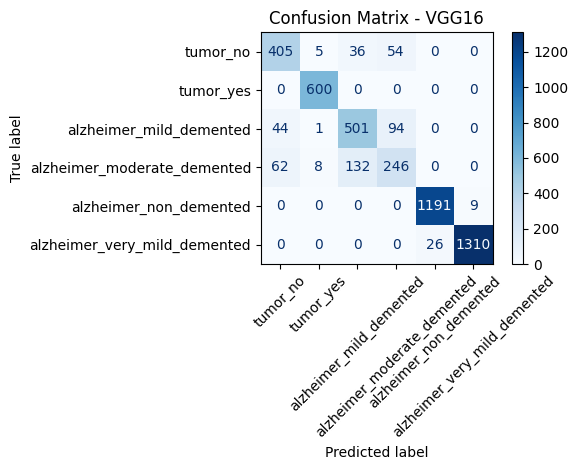

In [29]:
class_names = [
    "tumor_no",
    "tumor_yes",
    "alzheimer_mild_demented",
    "alzheimer_moderate_demented",
    "alzheimer_non_demented",
    "alzheimer_very_mild_demented"
]

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test


cm = confusion_matrix(y_true, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - VGG16")
plt.tight_layout()
plt.show()


## 3.4 - EfficientNetB0 - Transfer Learning Model and Training

EfficientNetB0 Transfer Learning was created for another deep learning model.

**EfficientNetB0  - Model Architecture**
*   `base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(64, 64, 3))` Loads the EfficientNetB0 model pre-trained on ImageNet without the top layer. The input shape is set to 64x64 RGB images.


In [30]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Ayarlar
input_shape = (64, 64, 3)
num_classes = 6

# EfficientNetB0 base model
base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

# Katmanları dondur (isteğe göre açabilirsin)
for layer in base_model.layers:
    layer.trainable = False

# Üst katmanlar
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Modeli oluştur
model_efficientnet = Model(inputs=base_model.input, outputs=output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**EfficientNetB0 - Model Compilation**

Adam optimizer was used but early stopping function stopped model training at epoch 6 and Epoch 1 was selected as the best model. Therefore, optimizer function was changed.

*   `learning_rate = 0.0001` learning rate value is decreased to increase learning.

In [31]:
model_efficientnet.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**EfficientNetB0 - Early Stop**

In [32]:
# EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=5,
                           restore_best_weights=True,
                           verbose=1)

**EfficientNetB0 - Checkpoint**

In [33]:
# Checkpoint
checkpoint = ModelCheckpoint('best_effnet_model.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1)


In [34]:
model_efficientnet.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 64, 64, 3) │          0 │ input_layer_2[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 64, 64, 3) │          7 │ rescaling[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 64, 64, 3) │          0 │ normalization[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 65, 65, 3) │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 32, 32,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 32, 32,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 32, 32,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 32, 32,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 32, 32,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 32, 32,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 32, 32,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 32, 32,    │        512 │ block1a_se_excit

 Total params: 4,214,313 (16.08 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

### 3.4.1 - EfficientNetB0 - Training

**Model Training - Time Calculation**

In [ ]:
import time
start = time.time()

history_efficientnet = model_efficientnet.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

#### 3.4.1.1 - EfficientNetB0 Training Visualization

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history_efficientnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_efficientnet.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history_efficientnet.history['loss'], label='Train Loss')
plt.plot(history_efficientnet.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 3.4.1.2 - EfficientNetB0 Confusion Matrix

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model

model = load_model("best_effnet_model.keras")

148/148 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step


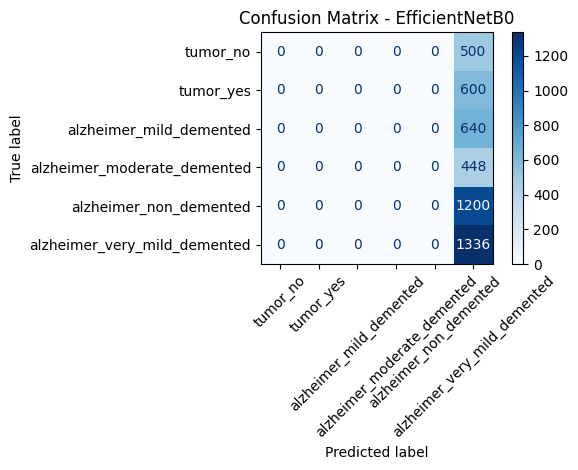

In [36]:
class_names = [
    "tumor_no",
    "tumor_yes",
    "alzheimer_mild_demented",
    "alzheimer_moderate_demented",
    "alzheimer_non_demented",
    "alzheimer_very_mild_demented"
]


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test


cm = confusion_matrix(y_true, y_pred)

# Görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - EfficientNetB0")
plt.tight_layout()
plt.show()


## 3.5 - ResNet50 - Transfer Learning Model

 ResNet50 Transfer Learning was created for another deep learning model.

**ResNet50  - Model Architecture**
*   base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))` Loads the EfficientNetB0 model pre-trained on ImageNet without the top layer. The input shape is set to 64x64 RGB images.

In [40]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


input_shape = (64, 64, 3)
num_classes = 6


base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model.input, outputs=output)

**ResNet50 - Model Compilation**

In [41]:
model_resnet50.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**ResNet50 - Early Stop**

In [42]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

**ResNet50 - Checkpoint**

In [43]:
checkpoint = ModelCheckpoint(
    'best_resnet50_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [44]:
model_resnet50.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 32, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 32, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,758 (90.98 MB)

 Trainable params: 263,046 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### 3.5.1 - ResNet50 - Transfer Learning Model Training

**Model Training - Time Calculation**

In [ ]:
import time
start = time.time()

history_resnet50 = model_resnet50.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

#### 3.5.1.1 - ResNet50 Training Visualization

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history_resnet50.history['loss'], label='Train Loss')
plt.plot(history_resnet50.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 3.5.1.2 - ResNet50 Confusion Matrix

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model

model = load_model("best_resnet50_model.h5")

148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step


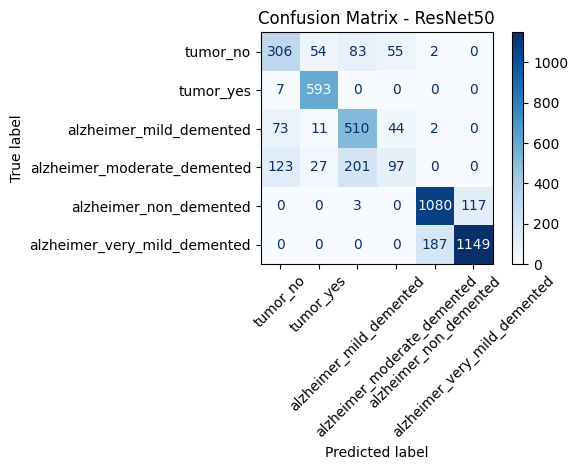

In [46]:
class_names = [
    "tumor_no",
    "tumor_yes",
    "alzheimer_mild_demented",
    "alzheimer_moderate_demented",
    "alzheimer_non_demented",
    "alzheimer_very_mild_demented"
]

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - ResNet50")
plt.tight_layout()
plt.show()


## 3.6 - DenseNet121 - Transfer Learning Model

DenseNet121 Transfer Learning was created for another deep learning model.

**DenseNet121  - Model Architecture**
*   base_model = DenseNet121(include_top=False,   weights='imagenet',input_shape=input_shape)` Loads the DenseNet121 model pre-trained on ImageNet without the top layer. The input shape is set to 64x64 RGB images.

In [47]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


input_shape = (64, 64, 3)
num_classes = 6


base_model = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)


model_densenet121 = Model(inputs=base_model.input, outputs=output)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


**DenseNet121 - Model Compilation**

In [48]:
# Compile
model_densenet121.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',  # veya sparse_categorical_crossentropy
    metrics=['accuracy']
)

**DenseNet121 - EarlyStop**

In [49]:
# EarlyStop
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=5,
                           restore_best_weights=True,
                           verbose=1)

**DenseNet121 - Checkpoint**

In [50]:
# Checkpoint
checkpoint = ModelCheckpoint('best_densenet121_model.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1)

In [51]:
model_densenet121.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 70, 70, 3) │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 32, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 32, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 34, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 16, 16,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 16, 16,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 16, 16,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 16, 16,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 16, 16,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 16, 16,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 16, 16,    │     12,288 │ conv2_block2_0_r

 Total params: 7,169,478 (27.35 MB)

 Trainable params: 131,974 (515.52 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

### 3.6.1 - DenseNet121 - Transfer Learning Model Training

**Model Training - Time Calculation**

In [ ]:
import time
start = time.time()

history_densenet121 = model_densenet121.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

end = time.time()
total_seconds = end - start
minutes = total_seconds // 60
seconds = total_seconds % 60

print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

#### 3.6.1.1 - DenseNet121 Training Visualization

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history_densenet121.history['accuracy'], label='Train Accuracy')
plt.plot(history_densenet121.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history_densenet121.history['loss'], label='Train Loss')
plt.plot(history_densenet121.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 3.6.1.2 - DenseNet121 Confusion Matrix

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model

model = load_model("best_densenet121_model.keras")

148/148 ━━━━━━━━━━━━━━━━━━━━ 24s 88ms/step


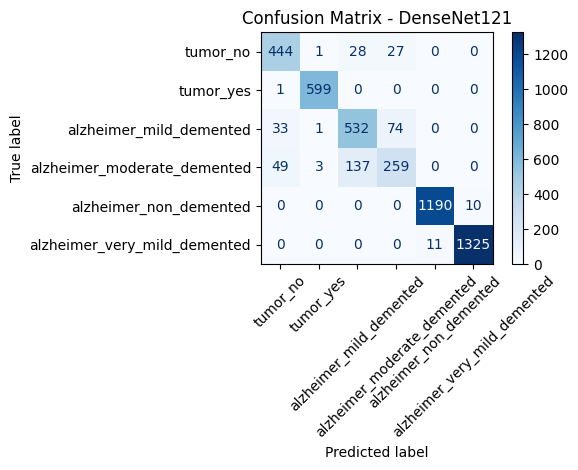

In [53]:
class_names = [
    "tumor_no",
    "tumor_yes",
    "alzheimer_mild_demented",
    "alzheimer_moderate_demented",
    "alzheimer_non_demented",
    "alzheimer_very_mild_demented"
]

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - DenseNet121")
plt.tight_layout()
plt.show()


## 3.7 - Machine Learning Models

## 3.10 - Compare All Models

In [54]:
import pandas as pd
from tensorflow.keras.models import load_model


model_paths = {
    'CNN': '/content/best_cnn_model_tumor.h5',
    'VGG16': '/content/best_vgg16_model_tumor.keras',
    'EfficientNet': '/content/best_efficientnet_model_tumor.keras',
    'ResNet50': '/content/best_resnet50_model_tumor.h5',
    'DenseNet121': '/content/best_densenet121_model_tumor.keras'
}


model_histories = {
    'CNN': history_cnn,
    'VGG16': history_vgg16,
    'EfficientNet': history_efficientnet,
    'ResNet50': history_resnet50,
    'DenseNet121': history_densenet121
}



model_comparisons = []


for model_name, model_path in model_paths.items():



    history = model_histories[model_name].history



    accuracy = round(history.get('accuracy', [None])[-1], 3)
    loss =  round(history.get('loss', ['N/A'])[-1], 3)
    val_accuracy = round(history.get('val_accuracy', ['N/A'])[-1], 3)
    val_loss = round(history.get('val_loss', ['N/A'])[-1], 3)


    if model_name == 'CNN':
        training_time = '1 minutes 14 seconds'
    elif model_name == 'VGG16':
        training_time = '14 minutes 36 seconds'
    elif model_name == 'EfficientNet':
        training_time = '1 minutes 10 seconds'
    elif model_name == 'ResNet50':
        training_time = '16 minutes 34 seconds'
    elif model_name == 'DenseNet121':
        training_time = '15 minutes 59 seconds'


    model_comparisons.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Loss': loss,
        'Validation Accuracy': val_accuracy,
        'Validation Loss': val_loss,
        'Training Time (m)': training_time
    })


df_comparison = pd.DataFrame(model_comparisons)


display(df_comparison)


df_comparison.set_index('Model')[['Accuracy', 'Loss', 'Validation Accuracy','Validation Loss']].plot(kind='bar', figsize=(12, 6))
plt.title("Model Comparison: Accuracy and Loss")
plt.ylabel("Value")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'history_cnn' is not defined

# 4 - Prediction

In [55]:
import zipfile
import os

# File and directory paths to extract
zip_path = "/content/test_datas.zip"
extract_path = "/content/test_datas"

# Open zip file and extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset successfully extracted to:", extract_path)


Dataset successfully extracted to: /content/test_datas


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


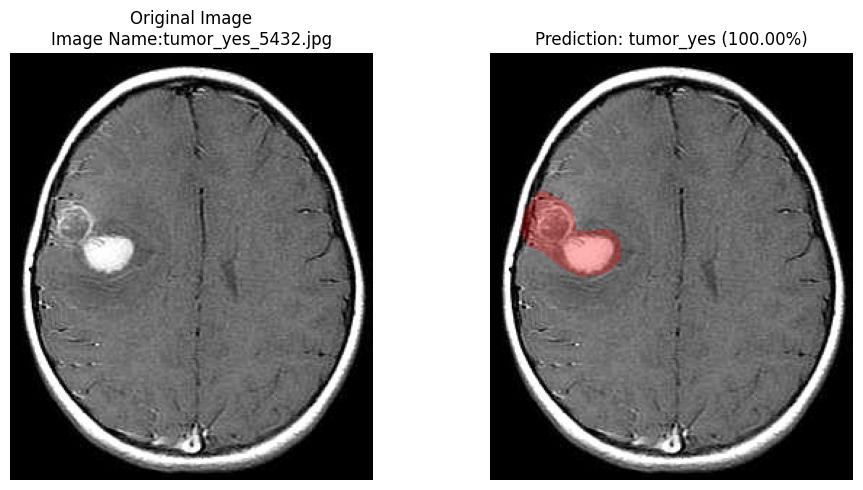

In [144]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import json
import cv2


class_names = [
    'alzheimer_mild_demented',       # index 0
    'alzheimer_moderate_demented',   # index 1
    'alzheimer_non_demented',        # index 2
    'alzheimer_very_mild_demented',  # index 3
    'tumor_no',                      # index 4
    'tumor_yes'                      # index 5
]


img_dir = '/content/test_datas/test_datas'
json_path = '/content/test_datas/test_datas/json_file'


all_images = [f for f in os.listdir(img_dir) if f.lower().endswith('.jpg')]
assert all_images, "Not Found Images"


img_name = random.choice(all_images)
img_path = os.path.join(img_dir, img_name)


json_file = img_name.replace('.jpg', '.json')
json_file_path = os.path.join(json_path, json_file)
json_exists = os.path.exists(json_file_path)


img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
input_img = np.expand_dims(img_array, axis=0)

model = load_model('/content/best_vgg16_model.keras')


pred_probs = model.predict(input_img)
pred_index = np.argmax(pred_probs)
pred_label = class_names[pred_index]
confidence = pred_probs[0][pred_index]


img_original = cv2.imread(img_path)
img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_with_boxes = img_original_rgb.copy()

if json_exists and pred_label == "tumor_yes":
    with open(json_file_path, 'r') as f:
        data = json.load(f)

    overlay = img_with_boxes.copy()
    for shape in data.get("shapes", []):
        if shape.get("label") == "tumor_yes" and shape.get("shape_type") == "polygon":
            points = shape.get("points", [])
            pts = np.array(points, dtype=np.int32).reshape((-1, 1, 2))


            cv2.fillPoly(overlay, [pts], color=(255, 0, 0))


            cv2.polylines(overlay, [pts], isClosed=True, color=(255, 0, 0), thickness=5)

    alpha = 0.3
    img_with_boxes = cv2.addWeighted(overlay, alpha, img_with_boxes, 1 - alpha, 0)

# 📊 Görselleştir
plt.figure(figsize=(10, 5))

# Sol: Orijinal
plt.subplot(1, 2, 1)
plt.imshow(img_original_rgb)
plt.title(f"Original Image\nImage Name:{img_name}")
plt.axis('off')

# Sağ: İşlenmiş
plt.subplot(1, 2, 2)
plt.imshow(img_with_boxes)
plt.title(f"Prediction: {pred_label} ({confidence*100:.2f}%)")
plt.axis('off')

plt.tight_layout()
plt.show()